<a href="https://colab.research.google.com/github/thais01fernandes/Analises-Mestrado/blob/main/Automatizacao_FCDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = #60b99a> **Passo a Passo Automatização FCDA**:
---

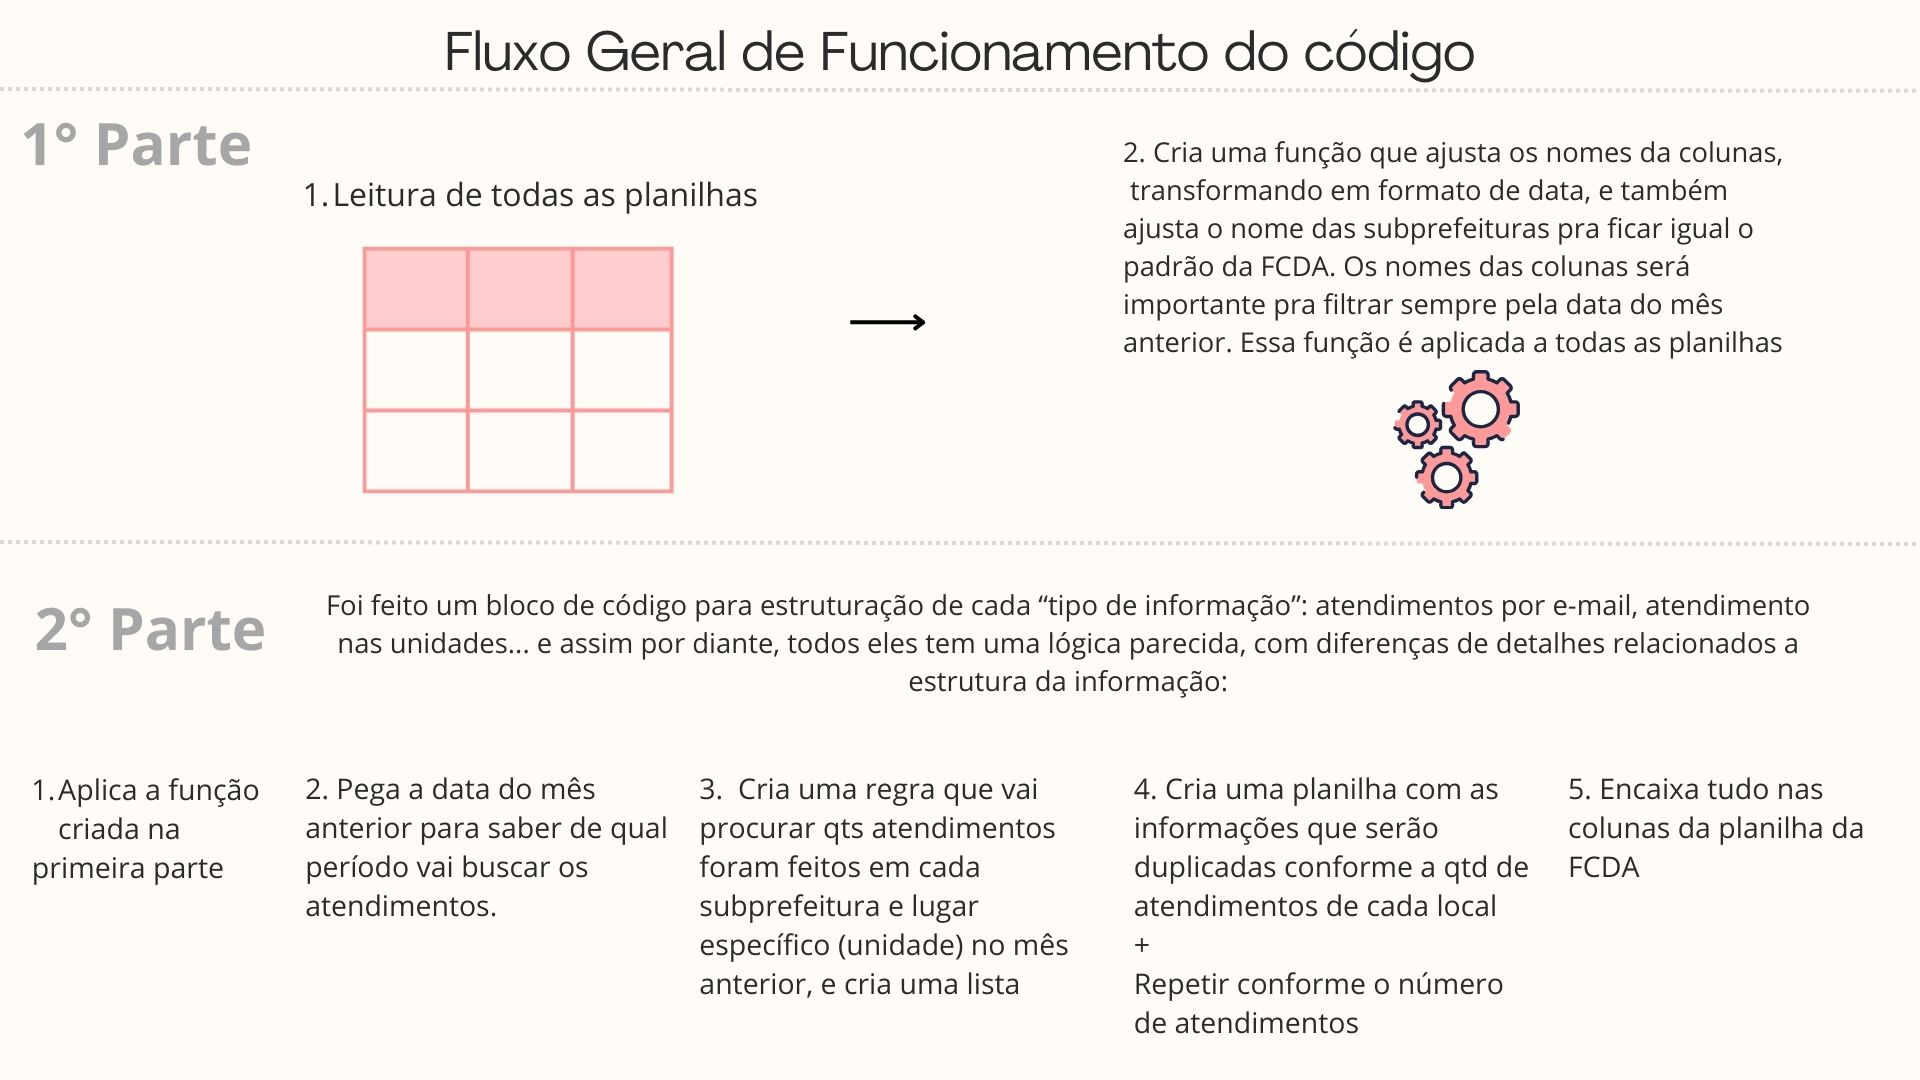


### <font color = #536c8d> **Passo 1: Instalar e importar bibliotecas**




In [1]:
#!pip install gspread
#!pip install oauth2client
#!pip install tabulate

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date, timedelta
import re
from dateutil.relativedelta import relativedelta
from tabulate import tabulate
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Mounted at /content/drive


### <font color = #536c8d> **Passo 2: Autorizar o acesso à conta do Google**



*   **Obtendo acesso a API do google sheets no Google cloud console**
    
    Para pode acessar as planilhas foi feito uma configuração, criou-se um projeto, credenciais e uma conta de serviço, depois gerou-se um arquivo json com as credenciais. Depois o passo a passo:
      1. Fazer o upload do arquivo aqui no colab
      2. Definir o escopo necessário para acessar o sheets
      3. Carregar o arquivo json com as credenciais
      4. Autorizar as credenciais
      5. Dar acesso a conta de serviço a cada uma das planilhas que irão ser acessadas (fcda-497@fcda-433019.iam.gserviceaccount.com)


In [3]:
# Definir o caminho do arquivo no Google Drive
caminho_arquivo_json = '/content/drive/Shareddrives/Gerência de Inteligência de Dados - GDI/9. Dados para Compartilhamento Externo/9.1 FCDA_SMDET/fcda-433019-21851394b7e5.json'

import gspread
from google.oauth2.service_account import Credentials

# Definir os escopos necessários para acessar o Google Sheets
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

# Carregar o arquivo de credenciais JSON diretamente do Google Drive
creds = Credentials.from_service_account_file(caminho_arquivo_json, scopes=SCOPES)

# Autorizar as credenciais
gc = gspread.authorize(creds)

### <font color = #536c8d> **Passo 3: Leitura de planilhas**

In [ ]:
import pandas as pd

# Planilha 1: FCDA colunas
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1c6nDB6oRdfwhH527Iumcg24R0T2Aeut4nC7dXh5lltI/edit?gid=0#gid=0"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(0)
data_range_1 = worksheet.get_all_values()
header_1 = data_range_1[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_1 = [row + [None] * (len(header_1) - len(row)) for row in data_range_1[1:]]
planilha_fcda  = pd.DataFrame(data_filled_1, columns=header_1)


# Planilha 2: atendimento_unidades
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1dcZirasgZtrNhAOtUcDRx2UhxaL2Gg-Y7UcGh9CDY2Y/edit?gid=277574398"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(5)
range_2 = "A27:P83"
data_range_2 = worksheet.get(range_2)
atendimento_unidades = pd.DataFrame(data_range_2[1:], columns=data_range_2[0])

# Planilha 3: atendimento_Campo
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1dcZirasgZtrNhAOtUcDRx2UhxaL2Gg-Y7UcGh9CDY2Y/edit?gid=277574398"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(5)
range_3 = "A87:M186"
data_range_3 = worksheet.get(range_3)
atendimento_Campo = pd.DataFrame(data_range_3[1:], columns=data_range_3[0])

# Planilha 4: agendamentos_confirmados
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1sJBRtxIFoW_Lj7qs6-wNee0vHdpgBn1vIbUbUSBVqJQ/edit?gid=906107566"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(4)
range_4 = "A1:P21"
data_range_4 = worksheet.get(range_4)
agendamentos_confirmados = pd.DataFrame(data_range_4[1:], columns=data_range_4[0])

# Planilha 5: acessos_sem_agendamentos
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1sJBRtxIFoW_Lj7qs6-wNee0vHdpgBn1vIbUbUSBVqJQ/edit?gid=906107566"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(4)
range_5 = "A24:P44"
data_range_5 = worksheet.get(range_5)
acessos_sem_agendamentos = pd.DataFrame(data_range_5[1:], columns=data_range_5[0])

# Planilha 6: atendimento_email
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1dcZirasgZtrNhAOtUcDRx2UhxaL2Gg-Y7UcGh9CDY2Y/edit?gid=277574398"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(5)
range_6 = "A21:N24"
data_range_6 = worksheet.get(range_6)
header_6 = data_range_6[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_6 = [row + [None] * (len(header_6) - len(row)) for row in data_range_6[1:]]
atendimento_email = pd.DataFrame(data_filled_6, columns=header_6)

# Planilha 7: atendimento_eventos
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1dcZirasgZtrNhAOtUcDRx2UhxaL2Gg-Y7UcGh9CDY2Y/edit?gid=277574398"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(5)
range_7 = "A15:N16"
data_range_7 = worksheet.get(range_7)
header_7 = data_range_7[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_7 = [row + [None] * (len(header_7) - len(row)) for row in data_range_7[1:]]
atendimento_eventos = pd.DataFrame(data_filled_7, columns=header_7)

# Planilha 8: sampa_cast
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1g0g5jmWPYmPOXY9hfjOp-K5pE6TogVOtyTRW3jXE5pM/edit?gid=0#gid=0"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(1)
range_8 = "B20:O27"
data_range_8 = worksheet.get(range_8)
header_8 = data_range_8[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_8 = [row + [None] * (len(header_8) - len(row)) for row in data_range_8[1:]]
sampa_cast = pd.DataFrame(data_filled_8, columns=header_8)

# Planilha 9: gestao_sampa
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1CkkexJG67xVjrQwCPnhbRUgzzDO6K_mxq-EQXXCRA9w/edit?gid=0#gid=0"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(1)
range_9 = "B20:O27"
data_range_9 = worksheet.get(range_9)
header_9 = data_range_9[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_9 = [row + [None] * (len(header_9) - len(row)) for row in data_range_9[1:]]
gestao_sampa = pd.DataFrame(data_filled_9, columns=header_9)

# Planilha 10: capacitacao
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1d3EvQrMEMH9m3zXXXjVTVsULZY4o5vigQmfzhNXa5Ug/edit?gid=0#gid=0"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(1)
range_10 = "B20:O26"
data_range_10 = worksheet.get(range_10)
header_10 = data_range_10[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_10 = [row + [None] * (len(header_10) - len(row)) for row in data_range_10[1:]]
capacitacao = pd.DataFrame(data_filled_10, columns=header_10)

# Planilha 11: credito
spreadsheet_url = "https://docs.google.com/spreadsheets/d/16IOJLhvlsKNiOMNbbdyKaYeIEMD6ycy5161IkcQGW-M/edit?gid=0#gid=0"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(1)
range_11 = "B20:O25"
data_range_11 = worksheet.get(range_11)
header_11 = data_range_11[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_11 = [row + [None] * (len(header_11) - len(row)) for row in data_range_11[1:]]
credito = pd.DataFrame(data_filled_11, columns=header_11)

# Planilha 12: atendimento_financeiro
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1fX3nGW90uxjE0DtdoBOXPXBkz6Xlg1sCEWV09-Ihq_o/edit?gid=1506056059#gid=1506056059"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(1)
range_12 = "B20:O30"
data_range_12 = worksheet.get(range_12)
header_12 = data_range_12[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_12 = [row + [None] * (len(header_12) - len(row)) for row in data_range_12[1:]]
atendimento_financeiro = pd.DataFrame(data_filled_12, columns=header_12)

# Planilha 13: vai_tec
spreadsheet_url = "https://docs.google.com/spreadsheets/d/12SpdU1pmg1fVDRjDwD3kb0f5HH0IrqHSZbgs2M5QoWE/edit?gid=1506056059#gid=1506056059"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(1)
range_13 = "D12:O13"
data_range_13 = worksheet.get(range_13)
header_13 = data_range_13[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_13 = [row + [None] * (len(header_13) - len(row)) for row in data_range_13[1:]]
vai_tec = pd.DataFrame(data_filled_13, columns=header_13)

# Planilha 14: green_sampa
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1otYR5WT-BsETjfbYEXvuNrrnASJ3zjHEl6m6SjTnGYs/edit?gid=0#gid=0"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(1)
range_14 = "D12:O13"
data_range_14 = worksheet.get(range_14)
header_14 = data_range_14[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_14 = [row + [None] * (len(header_14) - len(row)) for row in data_range_14[1:]]
green_sampa = pd.DataFrame(data_filled_14, columns=header_14)

# Planilha 15: sampa_games
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1z4ZvUuiu7Ez-a-2NQf8qf7b5b41fsNqiBKj1ppDi0fQ/edit?gid=0#gid=0"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(1)
range_15 = "D12:O13"
data_range_15 = worksheet.get(range_15)
header_15 = data_range_15[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_15 = [row + [None] * (len(header_15) - len(row)) for row in data_range_15[1:]]
sampa_games = pd.DataFrame(data_filled_15, columns=header_15)

# Planilha 16: amplifica_cine
spreadsheet_url = "https://docs.google.com/spreadsheets/d/15Fa-5na-QD7tchAHARkZJnwSioomA2sREbMUDthgpUA/edit?gid=0#gid=0"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(1)
range_16 = "D12:O13"
data_range_16 = worksheet.get(range_16)
header_16 = data_range_16[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_16 = [row + [None] * (len(header_16) - len(row)) for row in data_range_16[1:]]
amplifica_cine = pd.DataFrame(data_filled_16, columns=header_16)

# Planilha 17: C.O.E.
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1dcZirasgZtrNhAOtUcDRx2UhxaL2Gg-Y7UcGh9CDY2Y/edit?gid=277574398"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(5)
range_17 = "A1:N12"
data_range_17 = worksheet.get(range_17)
header_17 = data_range_17[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_17 = [row + [None] * (len(header_17) - len(row)) for row in data_range_17[1:]]
coe = pd.DataFrame(data_filled_17, columns=header_17)

# Planilhas Sampacast

### Pinheiros

spreadsheet_url = "https://docs.google.com/spreadsheets/d/1Jmxp9OkT6Ujg7HTFYJHSMcllTB6nEgXOZ6e6PH457rw/edit?gid=1214123231#gid=1214123231"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(9)
range_18 = "B2:O32"
data_range_18 = worksheet.get(range_18)
header_18 = data_range_18[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_18 = [row + [None] * (len(header_18) - len(row)) for row in data_range_18[1:]]
cast_pinheiros = pd.DataFrame(data_filled_18, columns=header_18)

### Heliópolis

spreadsheet_url = "https://docs.google.com/spreadsheets/d/1_oOYADL7TA1sMud5A2SG60XfUqsJ4RNNXmAUHjJKUi4/edit?gid=966782815#gid=966782815"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(9)
range_19 = "B2:O32"
data_range_19 = worksheet.get(range_19)
header_19 = data_range_19[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_19 = [row + [None] * (len(header_19) - len(row)) for row in data_range_19[1:]]
cast_heliopolis = pd.DataFrame(data_filled_19, columns=header_19)

### Vergueiro

spreadsheet_url = "https://docs.google.com/spreadsheets/d/1ZglAfPDGfgdRFYKVRChwmHmm4Rh8suIZRAp4szCf-gU/edit?gid=59111984#gid=59111984"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(6)
range_20 = "B2:O32"
data_range_20 = worksheet.get(range_20)
header_20 = data_range_20[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_20 = [row + [None] * (len(header_20) - len(row)) for row in data_range_20[1:]]
cast_vergueiro = pd.DataFrame(data_filled_20, columns=header_20)

### Lapa

spreadsheet_url = "https://docs.google.com/spreadsheets/d/1FwCtbVAG3dWr5u4aazMod_9M8NWHXO5jq65lWBCGowY/edit?gid=1172468202#gid=1172468202"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(9)
range_21 = "B2:O32"
data_range_21 = worksheet.get(range_21)
header_21 = data_range_21[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_21 = [row + [None] * (len(header_21) - len(row)) for row in data_range_21[1:]]
cast_lapa = pd.DataFrame(data_filled_21, columns=header_21)



In [5]:
# Planilhas Sampacast

### Pinheiros

spreadsheet_url = "https://docs.google.com/spreadsheets/d/1Jmxp9OkT6Ujg7HTFYJHSMcllTB6nEgXOZ6e6PH457rw/edit?gid=1214123231#gid=1214123231"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(9)
range_18 = "B2:O32"
data_range_18 = worksheet.get(range_18)
header_18 = data_range_18[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_18 = [row + [None] * (len(header_18) - len(row)) for row in data_range_18[1:]]
cast_pinheiros = pd.DataFrame(data_filled_18, columns=header_18)

### Heliópolis

spreadsheet_url = "https://docs.google.com/spreadsheets/d/1_oOYADL7TA1sMud5A2SG60XfUqsJ4RNNXmAUHjJKUi4/edit?gid=966782815#gid=966782815"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(9)
range_19 = "B2:O32"
data_range_19 = worksheet.get(range_19)
header_19 = data_range_19[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_19 = [row + [None] * (len(header_19) - len(row)) for row in data_range_19[1:]]
cast_heliopolis = pd.DataFrame(data_filled_19, columns=header_19)

### Vergueiro

spreadsheet_url = "https://docs.google.com/spreadsheets/d/1ZglAfPDGfgdRFYKVRChwmHmm4Rh8suIZRAp4szCf-gU/edit?gid=59111984#gid=59111984"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(6)
range_20 = "B2:O32"
data_range_20 = worksheet.get(range_20)
header_20 = data_range_20[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_20 = [row + [None] * (len(header_20) - len(row)) for row in data_range_20[1:]]
cast_vergueiro = pd.DataFrame(data_filled_20, columns=header_20)

### Lapa

spreadsheet_url = "https://docs.google.com/spreadsheets/d/1FwCtbVAG3dWr5u4aazMod_9M8NWHXO5jq65lWBCGowY/edit?gid=1172468202#gid=1172468202"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.get_worksheet(9)
range_21 = "B2:O32"
data_range_21 = worksheet.get(range_21)
header_21 = data_range_21[0]
# Preencher linhas com menos colunas que o cabeçalho com None
data_filled_21 = [row + [None] * (len(header_21) - len(row)) for row in data_range_21[1:]]
cast_lapa = pd.DataFrame(data_filled_21, columns=header_21)

### <font color = #536c8d> **Passo 4: Criar uma função para transformar os data frames**

In [ ]:
# Criando uma função que transforma as colunas das tabelas das fichas técnicas em formato de data pra depois filtrar sempre os valores do mês anterior e ajustando o nome das Subprefeituras:

def ajustar_data_e_subprefeitura(df):
    # Ajuste dos nomes das colunas, substituindo datas
    df.columns = [re.sub(r"mai\.? / ?24", "2024-05-01", col) for col in df.columns]
    df.columns = [re.sub(r"jun\.? / ?24", "2024-06-01", col) for col in df.columns]
    df.columns = [re.sub(r"jul\.? / ?24", "2024-07-01", col) for col in df.columns]
    df.columns = [re.sub(r"ago\.? / ?24", "2024-08-01", col) for col in df.columns]
    df.columns = [re.sub(r"set\.? / ?24", "2024-09-01", col) for col in df.columns]
    df.columns = [re.sub(r"out\.? / ?24", "2024-10-01", col) for col in df.columns]
    df.columns = [re.sub(r"nov\.? / ?24", "2024-11-01", col) for col in df.columns]
    df.columns = [re.sub(r"dez\.? / ?24", "2024-12-01", col) for col in df.columns]
    df.columns = [re.sub(r"jan\.? / ?25", "2025-01-01", col) for col in df.columns]
    df.columns = [re.sub(r"fev\.? / ?25", "2025-02-01", col) for col in df.columns]
    df.columns = [re.sub(r"mar\.? / ?25", "2025-03-01", col) for col in df.columns]
    df.columns = [re.sub(r"abr\.? / ?25", "2025-04-01", col) for col in df.columns]
    df.columns = [re.sub(r"mai\.?/2024", "2024-05-01", col) for col in df.columns]
    df.columns = [re.sub(r"jun\.?/2024", "2024-06-01", col) for col in df.columns]
    df.columns = [re.sub(r"jul\.?/2024", "2024-07-01", col) for col in df.columns]
    df.columns = [re.sub(r"ago\.?/2024", "2024-08-01", col) for col in df.columns]
    df.columns = [re.sub(r"set\.?/2024", "2024-09-01", col) for col in df.columns]
    df.columns = [re.sub(r"out\.?/2024", "2024-10-01", col) for col in df.columns]
    df.columns = [re.sub(r"nov\.?/2024", "2024-11-01", col) for col in df.columns]
    df.columns = [re.sub(r"dez\.?/2024", "2024-12-01", col) for col in df.columns]
    df.columns = [re.sub(r"jan\.?/2025", "2025-01-01", col) for col in df.columns]
    df.columns = [re.sub(r"fev\.?/2025", "2025-02-01", col) for col in df.columns]
    df.columns = [re.sub(r"mar\.?/2025", "2025-03-01", col) for col in df.columns]
    df.columns = [re.sub(r"abr\.?/2025", "2025-04-01", col) for col in df.columns]
    df.columns = [re.sub(r"Maio", "2024-05-01", col) for col in df.columns]
    df.columns = [re.sub(r"Junho", "2024-06-01", col) for col in df.columns]
    df.columns = [re.sub(r"Julho", "2024-07-01", col) for col in df.columns]
    df.columns = [re.sub(r"Agosto", "2024-08-01", col) for col in df.columns]
    df.columns = [re.sub(r"Setembro", "2024-09-01", col) for col in df.columns]
    df.columns = [re.sub(r"Outubro", "2024-10-01", col) for col in df.columns]
    df.columns = [re.sub(r"Novembro", "2024-11-01", col) for col in df.columns]
    df.columns = [re.sub(r"Dezembro", "2024-12-01", col) for col in df.columns]
    df.columns = [re.sub(r"Janeiro", "2025-01-01", col) for col in df.columns]
    df.columns = [re.sub(r"Fevereiro", "2025-02-01", col) for col in df.columns]
    df.columns = [re.sub(r"Março", "2025-03-01", col) for col in df.columns]
    df.columns = [re.sub(r"Abril", "2025-04-01", col) for col in df.columns]

    # Ajuste de "Subprefeitura" se existir no DataFrame
    if 'Subprefeitura' in df.columns:
        df['Subprefeitura'] = df['Subprefeitura'].fillna('').astype(str)
        df['Subprefeitura'] = df['Subprefeitura'].str.title()
        df['Subprefeitura'] = df['Subprefeitura'].str.replace(r'\bDo\b', 'do', regex=True)
        df['Subprefeitura'] = df['Subprefeitura'].str.strip()

        # Aplicar o case_when equivalente
        df['Subprefeitura'] = np.where(df['Subprefeitura'] == 'Aricanduva/ Carrão/ Formosa', 'Aricanduva/Formosa/Carrão', df['Subprefeitura'])
        df['Subprefeitura'] = np.where(df['Subprefeitura'] == 'Freguesia Ó/ Brasilândia', 'Freguesia/Brasilândia', df['Subprefeitura'])
        df['Subprefeitura'] = np.where(df['Subprefeitura'] == 'Perus/ Anhanguera', 'Perus', df['Subprefeitura'])
        df['Subprefeitura'] = np.where(df['Subprefeitura'] == 'Pirituba/Jaraguá', 'Pirituba', df['Subprefeitura'])
        df['Subprefeitura'] = np.where(df['Subprefeitura'] == 'Santana/ Tucuruvi', 'Santana/Tucuruvi', df['Subprefeitura'])
        df['Subprefeitura'] = np.where(df['Subprefeitura'] == 'São Miguel Paulista', 'São Miguel', df['Subprefeitura'])
        df['Subprefeitura'] = np.where(df['Subprefeitura'] == 'Casa Verde/ Cachoeirinha', 'Casa Verde/Cachoeirinha', df['Subprefeitura'])
        df['Subprefeitura'] = np.where(df['Subprefeitura'] == 'Vila Guilherme/ Vila Maria', 'Vila Maria/Vila Guilherme', df['Subprefeitura'])

    return df

# Criando uma string com a data do mês anterior pra usar de filtro nas tabelas das fichas técnicas:

# Data atual
mes_atual = pd.Timestamp.today()

# Definir o primeiro dia do mês atual e subtrair um mês
mes_anterior = mes_atual.replace(day=1) - pd.DateOffset(months=1)

# Converter para string no formato "YYYY-MM-DD"
mes_anterior = mes_anterior.strftime("%Y-%m")


### <font color = #536c8d> **Passo 5: Criando as linhas de Atendimento nas Unidades**

In [ ]:
# Passo 1: Aplicar a função para ajustar os nomes das colunas
atendimento_unidade_2 = ajustar_data_e_subprefeitura(atendimento_unidades)

# Mes anterior já obtido anteriormente
mes_anterior = pd.to_datetime(mes_anterior)

# Função para criar DataFrame para cada Subprefeitura e Unidade
def criar_df_para_unidade(subprefeitura, unidade):
    # Filtrar os dados para a subprefeitura e unidade especificadas
    filtro = atendimento_unidade_2[
        (atendimento_unidade_2['Subprefeitura'] == subprefeitura) &
        (atendimento_unidade_2['Atendimento nas unidades'] == unidade)
    ]

    # Selecionar a coluna que contém o mês anterior
    qtd_atendimento = filtro.filter(like=mes_anterior.strftime("%Y-%m")).values.flatten()

    # Converter para número, se houver valor
    qtd_atendimento = qtd_atendimento.astype(float) if len(qtd_atendimento) > 0 else np.array([0])

    # Caso não haja atendimento ou o valor seja NA, definir para 0
    if len(qtd_atendimento) == 0 or np.isnan(qtd_atendimento[0]):
        qtd_atendimento = 0

    # Criar o DataFrame base
    df_base = pd.DataFrame({
        'Mês do Atendimento': [mes_anterior.month],
        'Ano do Atendimento': [mes_anterior.year],
        'Subprefeitura': [subprefeitura],
        'Programa': ["Ade Sampa - Atendimento ao empreendedor"],
        'Presencial x Online x Híbrido': ["Presencial"],
        'AdeSampa - Tipo de Atendimento': ["Atendimento MEI nas Unidades e TEIAs"],
        'Outras informações': [f"Unidade {unidade}"]
    })

    # Repetir o DataFrame conforme o número de atendimentos
    if qtd_atendimento > 0:
        return pd.concat([df_base] * int(qtd_atendimento), ignore_index=True)
    else:
        return None  # Se não houver atendimento, retornar None

# Criar o DataFrame final com os dados de Subprefeitura e Unidade
subprefeitura_unidade_unique = atendimento_unidade_2[['Subprefeitura', 'Atendimento nas unidades']].drop_duplicates()

# Aplicar a função 'criar_df_para_unidade' para cada combinação de subprefeitura e unidade
df_final = pd.concat([
    criar_df_para_unidade(row['Subprefeitura'], row['Atendimento nas unidades'])
    for _, row in subprefeitura_unidade_unique.iterrows()
], ignore_index=True).dropna(how='all')

# Concatenar com o DataFrame existente (planilha_fcda)
resultado_final = pd.concat([planilha_fcda, df_final], ignore_index=True)



<ipython-input-8-ce49eb61f333>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return pd.concat([df_base] * int(qtd_atendimento), ignore_index=True)


In [ ]:
atendimento_unidade_2 = ajustar_data_e_subprefeitura(atendimento_unidades)
atendimento_unidade_2

,Atendimento nas unidades,Distrito,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01,2025-01-01,2025-02-01,2025-03-01,2025-03-01,Total,Subprefeitura
0,Aricanduva,CARRAO,103,63,6,73,,,,,,,,,245,Aricanduva/Formosa/Carrão
1,Brás - Largo da Concórdia,BRAS,19,40,43,47,,,,,,,,,149,Mooca
2,Butantã,VILA SONIA,206,185,215,197,,,,,,,,,803,Butantã
3,Campo Limpo,CAMPO LIMPO,160,140,176,168,,,,,,,,,644,Campo Limpo
4,Capela do Socorro,CIDADE DUTRA,170,147,169,131,,,,,,,,,617,Capela do Socorro
5,Casa Verde,CASA VERDE,21,35,25,27,,,,,,,,,108,Casa Verde/Cachoeirinha
6,Cate Central,REPUBLICA,228,190,168,149,,,,,,,,,735,Sé
7,Cidade Ademar,CIDADE ADEMAR,180,167,180,151,,,,,,,,,678,Cidade Ademar
8,Cidade Tiradentes,CIDADE TIRADENTES,331,246,274,272,,,,,,,,,1123,Cidade Tiradentes
9,Ermelino Matarazzo,PONTE RASA,38,45,50,77,,,,,,,,,210,Ermelino Matarazzo


### <font color = #536c8d> **Passo 6: Criando as linhas de Atendimento em Campo**

In [ ]:

# Aplicar a função de ajuste de datas e subprefeitura
atendimento_unidade_campo = ajustar_data_e_subprefeitura(atendimento_Campo)

# Preencher valores vazios com 0 e remover espaços das colunas
atendimento_unidade_campo = atendimento_unidade_campo.replace("", np.nan).fillna(0)
atendimento_unidade_campo.columns = atendimento_unidade_campo.columns.str.strip()

# Verificando as colunas de datas
colunas_datas = [col for col in atendimento_unidade_campo.columns if col.startswith("20")]

# Substituir pontos por nada nas colunas de datas para evitar interpretação incorreta dos números
for col in colunas_datas:
    atendimento_unidade_campo[col] = atendimento_unidade_campo[col].astype(str).str.replace('.', '', regex=False)
    atendimento_unidade_campo[col] = pd.to_numeric(atendimento_unidade_campo[col], errors='coerce').fillna(0)

# Garantir que as colunas com datas estão como numéricas
atendimento_unidade_campo[colunas_datas] = atendimento_unidade_campo[colunas_datas].apply(pd.to_numeric, errors='coerce').fillna(0)

# Sumarizar os dados agrupando por Subprefeitura e somando as colunas de datas
atendimento_unidade_campo_summarized = atendimento_unidade_campo.groupby('Subprefeitura', as_index=False)[colunas_datas].sum()

# Verificar a sumarização dos dados
print("Subprefeituras após sumarização:")
print(atendimento_unidade_campo_summarized)

# Agora vamos criar o DataFrame final com base na função para cada Subprefeitura
def criar_df_para_sub(subprefeitura, atendimento_unidade_campo_summarized, mes_anterior):
    # Selecionar a coluna do mês anterior para a subprefeitura específica
    filtro = atendimento_unidade_campo_summarized[atendimento_unidade_campo_summarized['Subprefeitura'] == subprefeitura]


    # Selecionar a coluna que corresponde ao mes_anterior
    qtd_atendimento = filtro.filter(like=mes_anterior.strftime("%Y-%m")).values.sum()  # Somar atendimentos para o


    # Verificar o valor de qtd_atendimento
    if pd.isna(qtd_atendimento) or qtd_atendimento == 0:
        return None  # Retornar None para subprefeituras sem atendimentos

    # Garantir que qtd_atendimento é um número inteiro
    qtd_atendimento = int(qtd_atendimento)

    # Criar o DataFrame base
    mes_anterior_dt = pd.to_datetime(mes_anterior)
    df_base = pd.DataFrame({
        'Mês do Atendimento': [mes_anterior_dt.month],
        'Ano do Atendimento': [mes_anterior_dt.year],
        'Subprefeitura': [subprefeitura],
        'Programa': ["Ade Sampa - Atendimento ao empreendedor"],
        'Presencial x Online x Híbrido': ["Presencial"],
        'AdeSampa - Tipo de Atendimento': ["Atendimento de Campo"]
    })

    # Repetir o DataFrame com base na quantidade de atendimentos
    if qtd_atendimento > 0:
        return pd.concat([df_base] * qtd_atendimento, ignore_index=True)
    else:
        return None


# Obter as Subprefeituras únicas
subprefeituras = atendimento_unidade_campo_summarized['Subprefeitura'].unique()

# Aplicar a função 'criar_df_para_sub' para cada subprefeitura
df_final_2 = pd.concat([df for df in (criar_df_para_sub(sub, atendimento_unidade_campo_summarized, mes_anterior)
                        for sub in subprefeituras) if df is not None], ignore_index=True)

# Combinar com 'planilha_fcda' (supondo que já esteja carregada como DataFrame)
resultado_final_1 = pd.concat([planilha_fcda, df_final_2], ignore_index=True)

# Substituir valores específicos de 'Subprefeitura'
resultado_final_1['Subprefeitura'] = resultado_final_1['Subprefeitura'].replace({
    "1. Não Regionalizado - Erro De Conexão Sgc": " ",
    "2. Não Regionalizado - Eusoumei Campo": " ",
    "3. Não Regionalizado - Google Forms": " ",
})





Subprefeituras após sumarização:
                                 Subprefeitura  2024-05-01  2024-06-01  \
0   1. Não Regionalizado - Erro De Conexão Sgc         140         201   
1        2. Não Regionalizado - Eusoumei Campo         384         122   
2          3. Não Regionalizado - Google Forms          40           0   
3                    Aricanduva/Formosa/Carrão         147         433   
4                                      Butantã         672         855   
5                                  Campo Limpo        1038        1713   
6                            Capela do Socorro        1894        3201   
7                      Casa Verde/Cachoeirinha         432        1225   
8                                Cidade Ademar         820        1076   
9                            Cidade Tiradentes         622         713   
10                          Ermelino Matarazzo         980        1130   
11                       Freguesia/Brasilândia         477         839   
12   

### <font color = #536c8d> **Passo 7: Criando as linhas de Atendimento por e-mail**

In [ ]:
# Mes anterior já obtido anteriormente
mes_anterior = pd.to_datetime(mes_anterior)

# Ajustar dados e subprefeituras
atendimento_email_1 = ajustar_data_e_subprefeitura(atendimento_email)

# Remover a segunda coluna, filtrar por 'Total', e selecionar a coluna que contém 'mes_anterior'
atendimento_email_1 = atendimento_email_1.drop(atendimento_email_1.columns[1], axis=1)
atendimento_email_1 = atendimento_email_1[atendimento_email_1['Atendimentos por e-mail'] == 'Total']
atendimento_email_1 = atendimento_email_1.filter(like=mes_anterior.strftime("%Y-%m")).values.flatten()[0]

# Criar o DataFrame com as informações do atendimento
df = pd.DataFrame({
    'Mês do Atendimento': [mes_anterior.month],
    'Ano do Atendimento': [mes_anterior.year],
    'Programa': ['Ade Sampa - Atendimento ao empreendedor'],
    'Presencial x Online x Híbrido': ['Online'],
    'AdeSampa - Tipo de Atendimento': ['Atendimento por E-mail']
})

# Combinar com a 'planilha_fcda_1' (supondo que já esteja carregada)
email_df_final = pd.concat([planilha_fcda, df], ignore_index=True)

# Replicar o DataFrame com base no número de atendimentos
resultado_final_2 = pd.concat([email_df_final] * int(atendimento_email_1), ignore_index=True)


### <font color = #536c8d> **Passo 8: Criando as linhas do C.O.E.**

In [ ]:
# Mes anterior já obtido anteriormente
mes_anterior = pd.to_datetime(mes_anterior)

# Ajustar dados e subprefeituras
coe_1 = ajustar_data_e_subprefeitura(coe)

# Remover a segunda coluna, filtrar por 'Total', e selecionar a coluna que contém 'mes_anterior'
coe_1 = coe_1.drop(coe_1.columns[1], axis=1)
coe_1 = coe_1[coe_1['Fonte'] == 'Totais de atendimentos atrelados ao COE']
coe_1 = coe_1.filter(like=mes_anterior.strftime("%Y-%m")).values.flatten()[0]

# Criar o DataFrame com as informações do atendimento
df = pd.DataFrame({
    'Mês do Atendimento': [mes_anterior.month],
    'Ano do Atendimento': [mes_anterior.year],
    'Programa': ['Ade Sampa - Ciclo de Orientação Empresarial (C.O.E)'],
    'Presencial x Online x Híbrido': ['Presencial'],
    'AdeSampa - Tipo de Atendimento': ['Ade Sampa - Ciclo de Orientação Empresarial (C.O.E)']
})

# Combinar com a 'planilha_fcda_1' (supondo que já esteja carregada)
coe_df_final = pd.concat([planilha_fcda, df], ignore_index=True)

# Replicar o DataFrame com base no número de atendimentos
resultado_final_3 = pd.concat([coe_df_final] * int(coe_1), ignore_index=True)

### <font color = #536c8d> **Passo 9: Criando as linhas de Atendimento em Eventos**

In [ ]:
# Mes anterior já obtido anteriormente
mes_anterior = pd.to_datetime(mes_anterior)

# Aplicar a função de ajuste de datas e subprefeitura
atendimento_eventos_1 = ajustar_data_e_subprefeitura(atendimento_eventos)

# Remover a segunda coluna (índice 1)
atendimento_eventos_1 = atendimento_eventos_1.drop(atendimento_eventos_1.columns[1], axis=1)

# Filtrar as colunas que contêm o mês anterior
qtd_atendimento = atendimento_eventos_1.filter(like=mes_anterior.strftime("%Y-%m")).values.flatten()[0]

# Criar o DataFrame com as informações do atendimento em eventos
df_eventos = pd.DataFrame({
    'Mês do Atendimento': [mes_anterior.month],
    'Ano do Atendimento': [mes_anterior.year],
    'Programa': ['Ade Sampa - Empreendedores atendidos em eventos v02'],
    'Presencial x Online x Híbrido': ['Presencial'],
    'AdeSampa - Tipo de Atendimento': ['Atendimento em Eventos']
})

# Combinar com a 'planilha_fcda_1' (supondo que já esteja carregada)
evento_df_final = pd.concat([planilha_fcda, df_eventos], ignore_index=True)

qtd_atendimento = int(qtd_atendimento.replace('.', ''))


# Replicar o DataFrame com base no número de atendimentos
resultado_final_4 = pd.concat([evento_df_final] * int(qtd_atendimento), ignore_index=True)

### <font color = #536c8d> **Passo 10: Criando as linhas de Agendamentos Confirmados**

In [ ]:
# Passo 1: Aplicar a função para ajustar os nomes das colunas
agendamentos_confirmados_2 = ajustar_data_e_subprefeitura(agendamentos_confirmados)

# Mes anterior já obtido anteriormente
mes_anterior = pd.to_datetime(mes_anterior)

# Função para criar DataFrame para cada Subprefeitura e Unidade
def criar_df_para_unidade(subprefeitura, unidade):
    # Filtrar os dados para a subprefeitura e unidade especificadas
    filtro = agendamentos_confirmados_2[
        (agendamentos_confirmados_2['Subprefeitura'] == subprefeitura) &
        (agendamentos_confirmados_2['Agendamentos Confirmados'] == unidade)
    ]

    # Selecionar a coluna que contém o mês anterior
    qtd_atendimento = filtro.filter(like=mes_anterior.strftime("%Y-%m")).values.flatten()

    # Converter para número, se houver valor
    qtd_atendimento = qtd_atendimento.astype(float) if len(qtd_atendimento) > 0 else np.array([0])

    # Caso não haja atendimento ou o valor seja NA, definir para 0
    if len(qtd_atendimento) == 0 or np.isnan(qtd_atendimento[0]):
        qtd_atendimento = 0

    # Criar o DataFrame base
    df_base = pd.DataFrame({
        'Mês do Atendimento': [mes_anterior.month],
        'Ano do Atendimento': [mes_anterior.year],
        'Subprefeitura': [subprefeitura],
        'Programa': ["Ade Sampa - Programa Teia"],
        'Presencial x Online x Híbrido': ["Presencial"],
        'AdeSampa - Tipo de Atendimento': ["Agendamentos Confirmados"],
        'Outras informações': [f"Unidade {unidade}"]
    })

    # Repetir o DataFrame conforme o número de atendimentos
    if qtd_atendimento > 0:
        return pd.concat([df_base] * int(qtd_atendimento), ignore_index=True)
    else:
        return None  # Se não houver atendimento, retornar None

# Criar o DataFrame final com os dados de Subprefeitura e Unidade
subprefeitura_unidade_unique = agendamentos_confirmados_2[['Subprefeitura', 'Agendamentos Confirmados']].drop_duplicates()

# Aplicar a função 'criar_df_para_unidade' para cada combinação de subprefeitura e unidade
df_final = pd.concat([
    criar_df_para_unidade(row['Subprefeitura'], row['Agendamentos Confirmados'])
    for _, row in subprefeitura_unidade_unique.iterrows()
], ignore_index=True).dropna(how='all')

# Concatenar com o DataFrame existente (planilha_fcda)
resultado_final_5 = pd.concat([planilha_fcda, df_final], ignore_index=True)

<ipython-input-14-49c4fe3438ea>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return pd.concat([df_base] * int(qtd_atendimento), ignore_index=True)


### <font color = #536c8d> **Passo 11: Criando as linhas de Acessos sem Agendamento**

In [ ]:
# Passo 1: Aplicar a função para ajustar os nomes das colunas
acessos_sem_agendamentos_2 = ajustar_data_e_subprefeitura(acessos_sem_agendamentos)

# Mes anterior já obtido anteriormente
mes_anterior = pd.to_datetime(mes_anterior)

# Função para criar DataFrame para cada Subprefeitura e Unidade
def criar_df_para_unidade(subprefeitura, unidade):
    # Filtrar os dados para a subprefeitura e unidade especificadas
    filtro = acessos_sem_agendamentos_2[
        (acessos_sem_agendamentos_2['Subprefeitura'] == subprefeitura) &
        (acessos_sem_agendamentos_2['Acessos Sem agendamento'] == unidade)
    ]

    # Selecionar a coluna que contém o mês anterior
    qtd_atendimento = filtro.filter(like=mes_anterior.strftime("%Y-%m")).values.flatten()

    # Converter para número, se houver valor
    qtd_atendimento = qtd_atendimento.astype(float) if len(qtd_atendimento) > 0 else np.array([0])

    # Caso não haja atendimento ou o valor seja NA, definir para 0
    if len(qtd_atendimento) == 0 or np.isnan(qtd_atendimento[0]):
        qtd_atendimento = 0

    # Criar o DataFrame base
    df_base = pd.DataFrame({
        'Mês do Atendimento': [mes_anterior.month],
        'Ano do Atendimento': [mes_anterior.year],
        'Subprefeitura': [subprefeitura],
        'Programa': ["Ade Sampa - Programa Teia"],
        'Presencial x Online x Híbrido': ["Presencial"],
        'AdeSampa - Tipo de Atendimento': ["Acesso sem agendamento"],
        'Outras informações': [f"Unidade {unidade}"]
    })

    # Repetir o DataFrame conforme o número de atendimentos
    if qtd_atendimento > 0:
        return pd.concat([df_base] * int(qtd_atendimento), ignore_index=True)
    else:
        return None  # Se não houver atendimento, retornar None

# Criar o DataFrame final com os dados de Subprefeitura e Unidade
subprefeitura_unidade_unique = acessos_sem_agendamentos_2[['Subprefeitura', 'Acessos Sem agendamento']].drop_duplicates()

# Aplicar a função 'criar_df_para_unidade' para cada combinação de subprefeitura e unidade
df_final = pd.concat([
    criar_df_para_unidade(row['Subprefeitura'], row['Acessos Sem agendamento'])
    for _, row in subprefeitura_unidade_unique.iterrows()
], ignore_index=True).dropna(how='all')

# Concatenar com o DataFrame existente (planilha_fcda)
resultado_final_6 = pd.concat([planilha_fcda, df_final], ignore_index=True)

<ipython-input-15-405634a18d5d>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return pd.concat([df_base] * int(qtd_atendimento), ignore_index=True)


### <font color = #536c8d> **Passo 12: Criando as linhas do Sampacast**

In [ ]:
# Aplicar a função de ajuste de datas e subprefeitura
atendimento_sampacast = ajustar_data_e_subprefeitura(sampa_cast)

# Mes anterior já obtido anteriormente
mes_anterior = pd.to_datetime(mes_anterior)

# Nomear a primeira coluna como 'Unidade'
atendimento_sampacast.columns.values[0] = 'Unidade'

# Excluir a segunda coluna (coluna 1, índice 1)
atendimento_sampacast = atendimento_sampacast.drop(atendimento_sampacast.columns[1], axis=1)

# Filtrar linhas onde 'Unidade' não é NaN e diferente de "Total"
atendimento_sampacast = atendimento_sampacast[atendimento_sampacast['Unidade'].notna() & (atendimento_sampacast['Unidade'] != "Total")]

# Substituir os valores na coluna 'Unidade'
atendimento_sampacast['Unidade'] = atendimento_sampacast['Unidade'].str.replace("Gravações ", "", regex=True)
atendimento_sampacast['Unidade'] = atendimento_sampacast['Unidade'].str.replace(" Paulista", "", regex=True)

# Criar a coluna 'Subprefeitura' com as condições
atendimento_sampacast['Subprefeitura'] = atendimento_sampacast['Unidade'].replace({
    "Heliopolis": "Ipiranga",
    "Lapa": "Lapa",
    "Pinheiros": "Pinheiros",
    "Vergueiro": "Sé",
    "São Miguel": "São Miguel"
}).fillna(atendimento_sampacast['Unidade'])  # Caso contrário, mantém o valor original de 'Unidade'

# Função para criar DataFrame para cada Subprefeitura e Unidade
def criar_df_para_unidade(subprefeitura, unidade):
    # Filtrar os dados para a subprefeitura e unidade especificadas
    filtro = atendimento_sampacast[
        (atendimento_sampacast['Subprefeitura'] == subprefeitura) &
        (atendimento_sampacast['Unidade'] == unidade)
    ]

    # Selecionar a coluna que contém o mês anterior
    qtd_atendimento = filtro.filter(like=mes_anterior.strftime("%Y-%m")).values.flatten()

    # Converter para número, se houver valor
    qtd_atendimento = qtd_atendimento.astype(float) if len(qtd_atendimento) > 0 else np.array([0])

    # Caso não haja atendimento ou o valor seja NA, definir para 0
    if len(qtd_atendimento) == 0 or np.isnan(qtd_atendimento[0]):
        qtd_atendimento = 0


    # Criar o DataFrame base
    df_base = pd.DataFrame({
        'Mês do Atendimento': [mes_anterior.month],
        'Ano do Atendimento': [mes_anterior.year],
        'Subprefeitura': [subprefeitura],
        'Programa': ["Ade Sampa - Sampacast"],
        'Presencial x Online x Híbrido': ["Presencial"],
        'AdeSampa - Tipo de Atendimento': ["Gravações"],
        'Outras informações': [f"Unidade {unidade}"]
    })

    # Repetir o DataFrame conforme o número de atendimentos
    if qtd_atendimento > 0:
        return pd.concat([df_base] * int(qtd_atendimento), ignore_index=True)
    else:
        return None  # Se não houver atendimento, retornar None

# Criar o DataFrame final com os dados de Subprefeitura e Unidade
subprefeitura_unidade_unique = atendimento_sampacast[['Subprefeitura', 'Unidade']].drop_duplicates()

# Aplicar a função 'criar_df_para_unidade' para cada combinação de subprefeitura e unidade
df_final = pd.concat([
    criar_df_para_unidade(row['Subprefeitura'], row['Unidade'])
    for _, row in subprefeitura_unidade_unique.iterrows()
], ignore_index=True).dropna(how='all')

# Concatenar com o DataFrame existente (planilha_fcda)
resultado_final_7 = pd.concat([planilha_fcda, df_final], ignore_index=True)


### <font color = #536c8d> **Passo 13: Criando as linhas do Gestão Sampa**

In [ ]:
# Aplicar a função de ajuste de datas e subprefeitura
gestao_sampa_1 = ajustar_data_e_subprefeitura(gestao_sampa)

# Filtrar a primeira coluna para 'Total' e selecionar a coluna que contém o mes_anterior
gestao_sampa_1 = gestao_sampa_1[gestao_sampa_1.iloc[:, 0] == "Total"]
gestao_sampa_1 = gestao_sampa_1.filter(like=mes_anterior.strftime("%Y-%m")).values.flatten()[0]

# Garantir que gestao_sampa_1 seja numérico
gestao_sampa_1 = float(gestao_sampa_1)

# Criar o DataFrame base
mes_anterior_dt = pd.to_datetime(mes_anterior)
df_base = pd.DataFrame({
    'Mês do Atendimento': [mes_anterior_dt.month],
    'Ano do Atendimento': [mes_anterior_dt.year],
    'Programa': ["Ade Sampa - Gestão Sampa"],
    'Presencial x Online x Híbrido': ["Online"]
})

# Replicar o DataFrame de acordo com o valor de gestao_sampa_1
df_final = pd.concat([df_base] * int(gestao_sampa_1), ignore_index=True)

# Combinar com o DataFrame planilha_fcda_1 (supondo que ele já esteja carregado)
resultado_final_8 = pd.concat([planilha_fcda, df_final], ignore_index=True)

### <font color = #536c8d> **Passo 14: Criando as linhas de Capacitações**

In [ ]:
# Aplicar a função de ajuste de datas e subprefeitura no DataFrame
capacitacao_1 = ajustar_data_e_subprefeitura(capacitacao)

# Nomear a primeira coluna como 'programa'
capacitacao_1.columns.values[0] = 'programa'

# Excluir a segunda coluna (coluna 1, índice 1)
capacitacao_1  = capacitacao_1 .drop(capacitacao_1.columns[1], axis=1)

# Transformar todas as colunas, exceto as duas primeiras, em strings e depois em números, substituindo "-" por NaN
capacitacao_1.iloc[:, 2:] = capacitacao_1.iloc[:, 2:].replace("-", np.nan).apply(pd.to_numeric, errors='coerce')

# Função para criar DataFrame para cada programa e calcular o número de atendimentos
def criar_df_para_sub(programa, capacitacao_1, mes_anterior):
    # Filtrar o DataFrame apenas para o programa atual
    df_programa = capacitacao_1[capacitacao_1['programa'] == programa]

    # Verificar se há colunas que contêm mes_anterior
    colunas_mes = df_programa.filter(like=mes_anterior.strftime("%Y-%m"))

    # Verificar se a coluna existe e tem valores
    if colunas_mes.shape[1] == 0 or colunas_mes.isna().all().all():
        qtd_atendimento = 0  # Atribuir 0 se não houver colunas ou se forem todas NaN
    else:
        qtd_atendimento = colunas_mes.sum().sum()  # Somar todos os valores, ignorando NaN

    # Criar o DataFrame base para o programa
    mes_anterior_dt = pd.to_datetime(mes_anterior)  # Converter mes_anterior para datetime
    df_base = pd.DataFrame({
        'Mês do Atendimento': [mes_anterior_dt.month],
        'Ano do Atendimento': [mes_anterior_dt.year],
        'Programa': [f"Ade Sampa - {programa}"],
        'Presencial x Online x Híbrido': ["Presencial"],
        'AdeSampa - Tipo de Atendimento': ["Capacitações Empreendedoras"]
    })

    # Repetir o DataFrame de acordo com o número de atendimentos
    if qtd_atendimento > 0:
        return pd.concat([df_base] * int(qtd_atendimento), ignore_index=True)
    else:
        return None  # Se não houver atendimentos, retornar None para não replicar

# Identificar todos os programas
programas = capacitacao_1['programa'].unique()

# Criar o DataFrame final combinando todos os programas
df_final_2 = pd.concat([criar_df_para_sub(prog, capacitacao_1, mes_anterior)
                        for prog in programas
                        if criar_df_para_sub(prog, capacitacao_1, mes_anterior) is not None],
                       ignore_index=True)

# Combinar com o DataFrame existente (planilha_fcda)
resultado_final_9 = pd.concat([planilha_fcda, df_final_2], ignore_index=True)



### <font color = #536c8d> **Passo 15: Criando as linhas de Fomento à Oportunidades de Crédito**

In [ ]:
# Aplicar a função de ajuste de datas e subprefeitura no DataFrame
credito_1 = ajustar_data_e_subprefeitura(credito)

# Renomear a primeira coluna
credito_1 = credito_1.rename(columns={credito_1.columns[0]: 'Outras informações'})

# Verificar e remover colunas duplicadas (se houver)
credito_1 = credito_1.loc[:, ~credito_1.columns.duplicated()]

# Filtrar os valores da coluna "Outras informações"
credito_1 = credito_1[
    credito_1['Outras informações'].isin(["c)Fundo de Aval", "b)Banco do Povo Paulista", "a)Caixa"])
]

# Converter todas as colunas (exceto as 1ª e 2ª) para string e depois para numérico, tratando "-" como NaN
credito_1.iloc[:, 2:] = credito_1.iloc[:, 2:].apply(lambda x: pd.to_numeric(x.replace("-", np.nan), errors='coerce'))

# Remover os primeiros dois caracteres da coluna "Outras informações"
credito_1['Outras informações'] = credito_1['Outras informações'].str[2:]

# Definindo a função para criar o DataFrame para cada programa e calcular o número de atendimentos
def criar_df_para_sub(outras_informacoes, credito_1, mes_anterior):
    # Filtrar o DataFrame apenas para o programa atual
    df_programa = credito_1[credito_1['Outras informações'] == outras_informacoes]

    # Verificar se há colunas que contêm mes_anterior
    qtd_atendimento = df_programa.filter(like=mes_anterior.strftime("%Y-%m")).values.flatten()

     # Caso não haja atendimento ou o valor seja NA, definir para 0
    if len(qtd_atendimento) == 0 or np.isnan(qtd_atendimento[0]):
        qtd_atendimento = 0

    # Criar o DataFrame base para o programa
    df_base = pd.DataFrame({
        'Mês do Atendimento': [pd.to_datetime(mes_anterior).month],
        'Ano do Atendimento': [pd.to_datetime(mes_anterior).year],
        'Programa': ["Ade Sampa - Microcrédito"],
        'Presencial x Online x Híbrido': ["Online"],
        'AdeSampa - Tipo de Atendimento': ["Empresas/indivíduos que receberam crédito"],
        'Outras informações': [outras_informacoes]
    })

    # Repetir o DataFrame de acordo com o número de atendimentos
    if qtd_atendimento > 0:
        return pd.concat([df_base] * int(qtd_atendimento), ignore_index=True)
    else:
        return None  # Se não houver atendimentos, retornar None


# Identificar todos os programas únicos
outras_info = credito_1['Outras informações'].unique()

# Criar o DataFrame final combinando todas as unidades
df_final_2 = pd.concat(
    [criar_df_para_sub(info, credito_1, mes_anterior) for info in outras_info if criar_df_para_sub(info, credito_1, mes_anterior) is not None],
    ignore_index=True
)

# Combinar com o DataFrame existente (planilha_fcda)
resultado_final_10 = pd.concat([planilha_fcda, df_final_2], ignore_index=True)

<ipython-input-19-39462479fba6>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return pd.concat([df_base] * int(qtd_atendimento), ignore_index=True)


In [ ]:
credito_1

,Outras informações,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01,2025-01-01,2025-02-01,2025-03-01,2025-04-01
1,Caixa,33,32,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Banco do Povo Paulista,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fundo de Aval,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color = #536c8d> **Passo 16: Criando as linhas de Empreendedores encaminhados para instituições financeiras**

In [ ]:

# Aplicar a função de ajuste de datas e subprefeitura
atendimento_financeiro_1 = ajustar_data_e_subprefeitura(atendimento_financeiro)

# Mes anterior já obtido anteriormente
mes_anterior = pd.to_datetime(mes_anterior)

# Verificar e remover colunas duplicadas (se houver)
atendimento_financeiro_1 = atendimento_financeiro_1.loc[:, ~atendimento_financeiro_1.columns.duplicated()]

# Renomear a coluna correspondente
atendimento_financeiro_1 = atendimento_financeiro_1.rename(columns={atendimento_financeiro_1.columns[0]: 'AdeSampa - Tipo de Atendimento'})

# Filtrar as linhas que atendem às condições
atendimento_financeiro_1 = atendimento_financeiro_1[
    atendimento_financeiro_1['AdeSampa - Tipo de Atendimento'].isin([
        "1)ATENDIMENTO POR E-MAIL",
        "2)ATENDIMENTO EM CAMPO",
        "5)Número de pessoas que terminaram curso empreendedorismo/finanças"
    ])
]

# Aplicar as mutações equivalentes ao `case_when`
atendimento_financeiro_1['AdeSampa - Tipo de Atendimento'] = atendimento_financeiro_1['AdeSampa - Tipo de Atendimento'].replace({
    "1)ATENDIMENTO POR E-MAIL": "Atendimento por E-mail",
    "2)ATENDIMENTO EM CAMPO": "Atendimento em Campo",
    "5)Número de pessoas que terminaram curso empreendedorismo/finanças": "Capacitação"
})

# Adicionar a coluna 'Presencial x Online x Híbrido'
atendimento_financeiro_1['Presencial x Online x Híbrido'] = atendimento_financeiro_1['AdeSampa - Tipo de Atendimento'].map({
    "Atendimento por E-mail": "Online",
    "Atendimento em Campo": "Presencial",
    "Capacitação": "Presencial"
})

# Adicionar a coluna 'Programa'
atendimento_financeiro_1['Programa'] = atendimento_financeiro_1['AdeSampa - Tipo de Atendimento'].map({
    "Atendimento por E-mail": "Ade Sampa - Microcrédito",
    "Atendimento em Campo": "Ade Sampa - Microcrédito",
    "Capacitação": "Ade Sampa - Curso Empreendedorismo/Finanças - TEIA"
})

# Adicionar a coluna 'Outras Informações'
atendimento_financeiro_1['Outras informações'] = atendimento_financeiro_1['AdeSampa - Tipo de Atendimento'].map({
    "Atendimento por E-mail": "Empreendedores encaminhados para instituições financeiras",
    "Atendimento em Campo": "Empreendedores encaminhados para instituições financeiras",
    "Capacitação": "Terminaram o curso empreendedorismo/finanças"
})

# Definindo a função para criar o dataframe por unidade
def criar_df_para_unidade_3(programa, presencial_online_hibrido, tipo_atendimento, outras_informacoes, mes_anterior, atendimento_financeiro_1):
    # Filtrar o dataframe para o programa, tipo de atendimento, etc. específicos
    filtro = atendimento_financeiro_1[
        (atendimento_financeiro_1['AdeSampa - Tipo de Atendimento'] == tipo_atendimento) &
        (atendimento_financeiro_1['Presencial x Online x Híbrido'] == presencial_online_hibrido) &
        (atendimento_financeiro_1['Programa'] == programa) &
        (atendimento_financeiro_1['Outras informações'] == outras_informacoes)
    ]

    mes_anterior = pd.to_datetime(mes_anterior)

    # Selecionar a coluna que contém o mês anterior e puxar o valor
    qtd_atendimento = filtro.filter(like=mes_anterior.strftime("%Y-%m")).values.flatten()


    # Garantir que qtd_atendimento seja um único valor numérico
    if len(qtd_atendimento) == 0 or pd.isna(qtd_atendimento[0]):
        qtd_atendimento = 0
    else:
        qtd_atendimento = int(qtd_atendimento[0])

    # Criar o dataframe base
    df_base = pd.DataFrame({
        'Mês do Atendimento': [mes_anterior_dt.month],
        'Ano do Atendimento': [mes_anterior_dt.year],
        'Programa': [programa],
        'Presencial x Online x Híbrido': [presencial_online_hibrido],
        'AdeSampa - Tipo de Atendimento': [tipo_atendimento],
        'Outras informações': [outras_informacoes]
    })

    # Repetir o dataframe de acordo com a quantidade de atendimentos
    if qtd_atendimento > 0:
        return pd.concat([df_base] * qtd_atendimento, ignore_index=True)
    else:
        return df_base  # Retornar sem replicar se qtd_atendimento for 0


# Criar dataframe final com base na função
df_final = pd.concat([
    criar_df_para_unidade_3(row['Programa'], row['Presencial x Online x Híbrido'], row['AdeSampa - Tipo de Atendimento'], row['Outras informações'], mes_anterior, atendimento_financeiro_1)
    for _, row in atendimento_financeiro_1[['Programa', 'Presencial x Online x Híbrido', 'AdeSampa - Tipo de Atendimento', 'Outras informações']].drop_duplicates().iterrows()
], ignore_index=True)

# Combinar com 'planilha_fcda_1'
resultado_final_11 = pd.concat([planilha_fcda, df_final], ignore_index=True)



### <font color = #536c8d> **Passo 17: Criando as linhas das Acelerações - Vai Tec, Green Sampa, Sampa Games, Amplifica Cine**




In [ ]:
# Ajustar e adicionar coluna 'Programa' para cada dataframe
vai_tec_1 = ajustar_data_e_subprefeitura(vai_tec).assign(Programa="Ade Sampa - Vai Tec (manutenção)")
green_sampa_1 = ajustar_data_e_subprefeitura(green_sampa).assign(Programa="Ade Sampa - Green Sampa (manutenção)")

# Ajustar 'sampa_games' com conversão de valores e adicionar 'Programa'
sampa_games_1 = (ajustar_data_e_subprefeitura(sampa_games)
                 .apply(lambda col: pd.to_numeric(col.replace("-", np.nan), errors='coerce') if col.name not in ['col1', 'col2'] else col)  # Converter '-' para NaN
                 .assign(Programa="Ade Sampa - Sampa Games (manutenção)"))

# Ajustar e adicionar 'Programa' para amplifica_cine
amplifica_cine_1 = ajustar_data_e_subprefeitura(amplifica_cine).assign(Programa="Ade Sampa - Amplifica Cine (manutenção)")

# Unir os dataframes
aceleracao_1 = pd.concat([vai_tec_1, green_sampa_1, sampa_games_1,  amplifica_cine_1], ignore_index=True)

# Função para criar DataFrame para cada programa e calcular o número de atendimentos
def criar_df_para_sub(programa, aceleracao_1, mes_anterior):
    # Filtrar o DataFrame para o programa atual
    df_programa = aceleracao_1[aceleracao_1['Programa'] == programa]

    # Mes anterior já obtido anteriormente
    mes_anterior = pd.to_datetime(mes_anterior)

    # Verificar se há colunas que contêm o mes_anterior
    qtd_atendimento = df_programa.filter(like=mes_anterior.strftime("%Y-%m")).values.flatten()

    # Converter valores para numérico e ignorar NaNs
    qtd_atendimento = pd.to_numeric(qtd_atendimento, errors='coerce').sum()

    # Criar o DataFrame base para o programa
    mes_anterior_dt = pd.to_datetime(mes_anterior)
    df_base = pd.DataFrame({
        'Mês do Atendimento': [mes_anterior_dt.month],
        'Ano do Atendimento': [mes_anterior_dt.year],
        'Programa': [programa],
        'Presencial x Online x Híbrido': ["Híbrido"],
        'AdeSampa - Tipo de Atendimento': ["Aceleração"]
    })

    # Repetir o DataFrame de acordo com o número de atendimentos
    if qtd_atendimento > 0:
        return pd.concat([df_base] * int(qtd_atendimento), ignore_index=True)
    else:
        return None  # Se não houver atendimentos, retornar None para não replicar



# Identificar todos os programas únicos
programas = aceleracao_1['Programa'].unique()

# Criar o DataFrame final combinando todas as unidades
df_final_2 = pd.concat(
    [criar_df_para_sub(prog, aceleracao_1, mes_anterior) for prog in programas if criar_df_para_sub(prog, aceleracao_1, mes_anterior) is not None],
    ignore_index=True
)

# Combinar com o DataFrame existente (planilha_fcda_1)
resultado_final_12 = pd.concat([planilha_fcda, df_final_2], ignore_index=True)

### <font color = #536c8d> **Passo 18: Criando as linhas das Fichas técnicas que precisam de imput manual de quantidade de atendimentos**



*   Acelerando Hortas
*   Fashoin Sampa
*   Eventos

In [ ]:
# Função para replicar DataFrames com base em qtd_atendimento
def replicar_atendimento(qtd_atendimento, mes_anterior, programa, presencial_online, tipo_atendimento):
    # Se qtd_atendimento for 0, retorna um DataFrame vazio
    if qtd_atendimento == 0:
        return pd.DataFrame()

    # Criar o DataFrame base
    df_base = pd.DataFrame({
        'Mês do Atendimento': [mes_anterior.month],
        'Ano do Atendimento': [mes_anterior.year],
        'Programa': [programa],
        'Presencial x Online x Híbrido': [presencial_online],
        'AdeSampa - Tipo de Atendimento': [tipo_atendimento],

    })

    # Replicar o DataFrame de acordo com qtd_atendimento
    return pd.concat([df_base] * qtd_atendimento, ignore_index=True)

# Acelerando Hortas
qtd_atendimento_hortas = 20
df_final_1 = replicar_atendimento(qtd_atendimento_hortas, mes_anterior,
                                   "Ade Sampa - Acelerando Hortas (manutenção)", "Híbrido", "Aceleração")
resultado_final_hortas = pd.concat([planilha_fcda, df_final_1], ignore_index=True)

# Fashion Sampa
qtd_atendimento_fashion = 0
df_final_2 = replicar_atendimento(qtd_atendimento_fashion, mes_anterior,
                                   "Ade Sampa - Fashion Sampa", "Híbrido", "Aceleração")
resultado_final_fashion = pd.concat([planilha_fcda, df_final_2], ignore_index=True)

# Eventos Café com empreendedoras
qtd_atendimento_eventos = 182
df_final_3 = replicar_atendimento(qtd_atendimento_eventos, mes_anterior,
                                   "Ade Sampa - Eventos", "Presencial", "Estande Institucioanal")
resultado_final_eventos = pd.concat([planilha_fcda, df_final_3], ignore_index=True)

# Eventos Parceria ESPM
qtd_atendimento_eventos = 23
df_final_4 = replicar_atendimento(qtd_atendimento_eventos, mes_anterior,
                                   "Ade Sampa - Eventos", "Presencial", "Estande Institucioanal")
resultado_final_eventos_2 = pd.concat([planilha_fcda, df_final_4], ignore_index=True)

# Resultado final para todos os DataFrames
resultado_final_13 = pd.concat([resultado_final_hortas, resultado_final_fashion, resultado_final_eventos, resultado_final_eventos_2], ignore_index=True)

### <font color = #536c8d> **Passo 19: Gerando a FCDA final e salvando no Drive**

In [ ]:
fcda_final= pd.concat([resultado_final, resultado_final_1, resultado_final_2, resultado_final_3, resultado_final_4, resultado_final_5, resultado_final_6,
                       resultado_final_8, resultado_final_9, resultado_final_10, resultado_final_11,
                       resultado_final_12, resultado_final_13], ignore_index=True)

In [ ]:
# Definir o caminho do arquivo no Google Drive
caminho_arquivo = '/content/drive/Shareddrives/Gerência de Inteligência de Dados - GDI/9. Dados para Compartilhamento Externo/9.1 FCDA_SMDET/FCDA [ADESAMPA] 2024 08.xlsx'

# Salvar o DataFrame como um arquivo Excel
fcda_final.to_excel(caminho_arquivo, index=False)

### <font color = #536c8d> **Passo 20: Tabela de verificação**

In [ ]:
# Contar as combinações e transformar o resultado em um DataFrame
contagem_subprefeitura = fcda_final[['Programa', 'AdeSampa - Tipo de Atendimento']].value_counts().reset_index()

# Renomear as colunas para uma melhor apresentação
contagem_subprefeitura.columns = ['Programa', 'AdeSampa - Tipo de Atendimento', 'Contagem']

# Organizar a tabela para exibição amigável
contagem_subprefeitura = contagem_subprefeitura.sort_values(by='Contagem', ascending=False)

# Exibir a tabela resultante de forma mais amigável com tabulate
print(tabulate(contagem_subprefeitura, headers='keys', tablefmt='pretty', showindex=False))

total_linhas = fcda_final.shape[0]
print(f"Total de linhas: {total_linhas}")

+-----------------------------------------------------+-----------------------------------------------------+----------+
|                      Programa                       |           AdeSampa - Tipo de Atendimento            | Contagem |
+-----------------------------------------------------+-----------------------------------------------------+----------+
|       Ade Sampa - Atendimento ao empreendedor       |                Atendimento de Campo                 |  41477   |
|       Ade Sampa - Atendimento ao empreendedor       |        Atendimento MEI nas Unidades e TEIAs         |   5272   |
|              Ade Sampa - Programa Teia              |               Acesso sem agendamento                |   2976   |
|              Ade Sampa - Programa Teia              |              Agendamentos Confirmados               |   2915   |
|              Ade Sampa - Microcrédito               |                Atendimento em Campo                 |   2318   |
| Ade Sampa - Empreendedores ate